## Lab 2 Template

zID: z5325417

Name: Guanzhu Hou

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [2]:
import math
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [21]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0 #number of key points, return the best n_features
            params["n_octave_layers"]=3 #Number of layers per group in the pyramid
            params["contrast_threshold"]=0.03 #the bigger this value, the fewer key points
            params["edge_threshold"]=10 #the bigger this value, the more key points
            params["sigma"]=1.6 #sigma

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [22]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [23]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Beehive_Corner_Adelaide.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

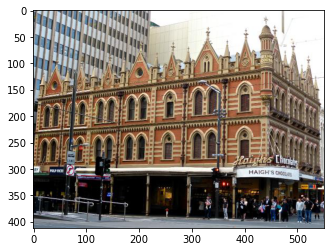

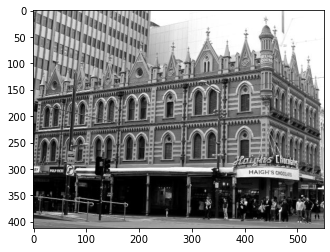

In [24]:
#show the original picture and the gray picture
img = cv2.imread('Beehive_Corner_Adelaide.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#in cv2 BGR, in plt RGB
gray = cv2.imread('Beehive_Corner_Adelaide.png', cv2.IMREAD_GRAYSCALE)                         
plt.figure(1)
plt.imshow(img2)
plt.figure(2)
plt.imshow(gray,'gray')

The shape of keypoints: (3570,)


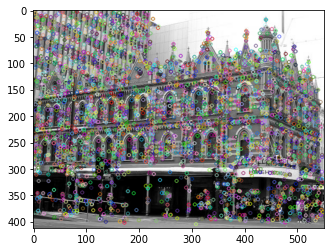

In [39]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)
#1(a)
sift = SiftDetector()  #instantiation

#SiftDetector, simply requires a grayscale image to find keypoints.
keypoints,fv = sift.detector.detectAndCompute(gray, None)  #calculate the SIFT feature vector corresponding to the key points
img_kp = cv2.drawKeypoints(gray, keypoints, None)   #draw the key points, output is img3

cv2.imwrite("Task_1a.png", img_kp)
plt.imshow(img_kp)
print('The shape of keypoints:', np.shape(keypoints))

The shape of keypoints: (378,)
378 is approximately 0.1 of the total number of the default points.


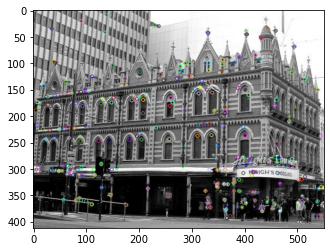

In [38]:
#1(b)
#all the parameters should be contained or there will be some errors
params = {"n_features": 0,
         "n_octave_layers":3,
         "contrast_threshold":0.16,#the bigger this value, the more key points
         "edge_threshold":10,
         "sigma":1.6}
keypoints_b, fv_b = sift.get_detector(params).detectAndCompute(gray, None)
img_kp_b = cv2.drawKeypoints(gray, keypoints_b, None)

cv2.imwrite("Task_1b.png", img_kp_b)
plt.imshow(img_kp_b)
print('The shape of keypoints:',np.shape(keypoints_b))
print('378 is approximately 0.1 of the total number of the default points.')

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


original gray: 412 550
enlarge gray: 494 660


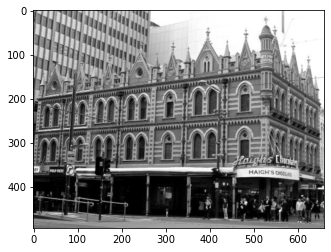

In [68]:
# Write your code here and display images obtained in 2(b) and 2(d). Also, write your answer to 2(c) in a new cell.
#2(a)
print('original gray:',gray.shape[0],gray.shape[1])
#first width, then height
size = (int(gray.shape[1]*1.2),int(gray.shape[0]*1.2))

enlarge = cv2.resize(gray, size)
plt.imshow(enlarge,'gray')
print('enlarge gray:',enlarge.shape[0],enlarge.shape[1])

The shape of keypoints: (345,)


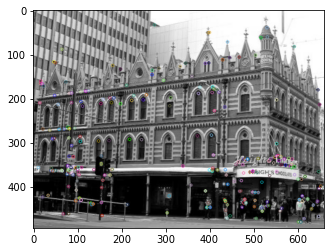

In [54]:
#2(b)
params = {"n_features": 0,
         "n_octave_layers":3,
         "contrast_threshold":0.16,#the bigger this value, the more key points
         "edge_threshold":10,
         "sigma":1.6}
keypoints_large, fv_large = sift.get_detector(params).detectAndCompute(enlarge, None)
img_kp_large = cv2.drawKeypoints(enlarge, keypoints_large, None)

cv2.imwrite("Task_2b.png", img_kp_large)
plt.imshow(img_kp_large)
print('The shape of keypoints:',np.shape(keypoints_large))

### 2(c)
##### The keypoints in 2b are very close to that in 1b, which means the scale change of the picture does not change the number of keypoints.

original: (137.538818359375, 361.155029296875) scaled: (114.64749145507812, 301.18365478515625)
original: (249.45335388183594, 203.209228515625) scaled: (207.84832763671875, 169.31488037109375)
original: (227.9746551513672, 193.29843139648438) scaled: (189.9451904296875, 161.1410675048828)
original: (48.57197952270508, 193.2214813232422) scaled: (40.46492385864258, 161.11338806152344)
original: (646.1307373046875, 180.4429473876953) scaled: (538.579345703125, 150.457275390625)


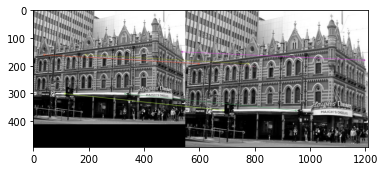

In [82]:
#2(d)
#Brute-force matching is available in OpenCV for feature matching
#L1 and L2 norms are preferable choices for SIFT and SURF descriptors
BF = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False) 
matches = BF.knnMatch(fv_b, fv_large, k=2)

#the nearest-neighbour distance ratio method
nice = []
for i,j in matches:
    if i.distance < 0.75*j.distance:
        nice.append([i])
def Sort_the_Nice(x):
    return x[0].distance
nice.sort(key=Sort_the_Nice)

#After extracting the features of the two images, draw the matching point to line.
img_kp_2d = cv2.drawMatchesKnn(gray,keypoints_b,enlarge,keypoints_large,nice[:6],None,flags=2)

#show the result
for i in nice[:5]:
    #training and query 
    print('original:',keypoints_large[i[0].trainIdx].pt,"scaled:",keypoints_b[i[0].queryIdx].pt)
cv2.imwrite("Task_2d.png", img_kp_2d)
plt.imshow(img_kp_2d)


## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 60 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

In [ ]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.

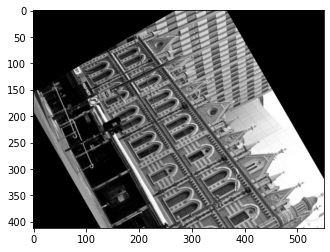

In [84]:
#3(a)
center = get_img_center(gray)
img_rotate = rotate(gray,center[0],center[1],-60)
plt.imshow(img_rotate,'gray')

The shape of keypoints: (203,)


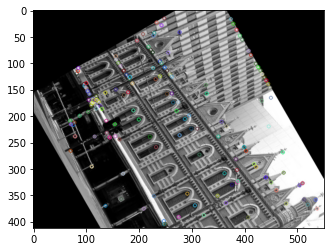

In [85]:
#3(b)
keypoints_rotate, fv_rotate = sift.get_detector(params).detectAndCompute(img_rotate, None)
img_kp_ro = cv2.drawKeypoints(img_rotate, keypoints_rotate, None)

cv2.imwrite("Task_3b.png", img_kp_ro)
plt.imshow(img_kp_ro)
print('The shape of keypoints:',np.shape(keypoints_rotate))

### 3(c)
##### The keypoints in 2b are very close to that in 1b, which means the rotation of the picture does not change the number of keypoints.

original: (137.538818359375, 361.155029296875) scaled: (114.64749145507812, 301.18365478515625)
original: (249.45335388183594, 203.209228515625) scaled: (207.84832763671875, 169.31488037109375)
original: (227.9746551513672, 193.29843139648438) scaled: (189.9451904296875, 161.1410675048828)
original: (48.57197952270508, 193.2214813232422) scaled: (40.46492385864258, 161.11338806152344)
original: (646.1307373046875, 180.4429473876953) scaled: (538.579345703125, 150.457275390625)


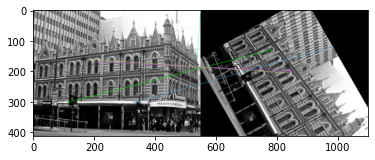

In [86]:
#3(d)
matches_r = BF.knnMatch(fv_b, fv_rotate, k=2)

#the nearest-neighbour distance ratio method
nice = []
for i,j in matches:
    if i.distance < 0.75*j.distance:
        nice.append([i])
def Sort_the_Nice(x):
    return x[0].distance
nice.sort(key=Sort_the_Nice)

#After extracting the features of the two images, draw the matching point to line.
img_kp_3d = cv2.drawMatchesKnn(gray,keypoints_b,img_rotate,keypoints_rotate,nice[:6],None,flags=2)

#show the result
for i in nice[:5]:
    #training and query 
    print('original:',keypoints_large[i[0].trainIdx].pt,"scaled:",keypoints_b[i[0].queryIdx].pt)
cv2.imwrite("Task_3d.png", img_kp_3d)
plt.imshow(img_kp_3d)